## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
import requests

target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
data_tmp = requests.get(target_url)

if data_tmp.status_code == requests.codes.ok:
    print("Get data from URL success.")

data = data_tmp.text
print(data)

Get data from URL success.
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_6

In [3]:
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [4]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

arrange_data = data.split(split_tag)
print(len(arrange_data))
arrange_data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [71]:
import pandas as pd

df = pd.DataFrame(arrange_data)
df.columns = ['URL']

# new data frame with split value columns
df2 = df["URL"].str.split("\t", n = 1, expand = True) 

df2.columns = ['Image','URL']
pd.set_option('display.max_rows', len(arrange_data))
print(df2)

                Image                                                URL
0       n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1       n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2       n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3       n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4       n00015388_355  http://img100.imageshack.us/img100/3253/forres...
5       n00015388_373  http://img172.imageshack.us/img172/4606/napo03...
6       n00015388_379  http://fotootjesvanannelies.web-log.nl/olifant...
7       n00015388_388  http://www.deweekkrant.nl/images/library/pictu...
8       n00015388_442  http://www.porschemania.it/discus/messages/815...
9       n00015388_474  http://farm1.static.flickr.com/72/225029238_80...
10      n00015388_514  http://farm2.static.flickr.com/1128/1432436038...
11      n00015388_671  http://farm4.static.flickr.com/3217/2942611930...
12      n00015388_686  http://farm1.static.flickr.c

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

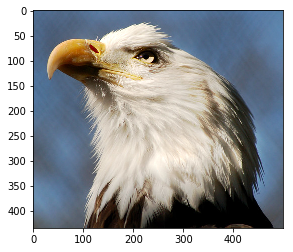

In [72]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df2.loc[0].URL

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [77]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    from PIL import Image
    from io import BytesIO
    import numpy as np
    import matplotlib.pyplot as plt

    img_list = []

    for i in range(len(url_list)):
        response = requests.get(url_list[i])
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except IOError:
            print("Get image from URL:", url_list[i], "failed.")
            pass
        continue

    return img_list

Get image from URL: http://img100.imageshack.us/img100/3253/forrest004fs9.jpg failed.
Get image from URL: http://img172.imageshack.us/img172/4606/napo03072en9.jpg failed.
Get image from URL: http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg failed.
Get image from URL: http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg failed.
Get image from URL: http://www.porschemania.it/discus/messages/815/102099.jpg failed.
Get image from URL: http://www.dierentuin.nl/images/jongengiraffe.jpg failed.
Get image from URL: http://farm4.static.flickr.com/3279/3118047175_259ab89c92.jpg failed.
Get image from URL: https://w3f7yg.bay.livefilestore.com/y1miLTQmcuoRakgVwM6_bngzVE6TzzugspJiu6zK1_8F_kAD0tLiNV6nRNu9gQjci3MNbubrk3M8pSQlHpG3a8NO88Qx4dvvuugxBvdzeYg1j4KQk45GZIrKYpqxRxRMhCWK3PxXknn61E/IMG_4991斑马.jpg failed.
Total images that we got: 12 


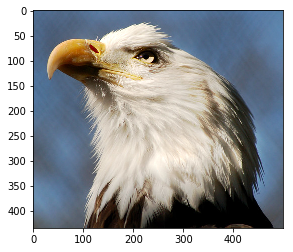

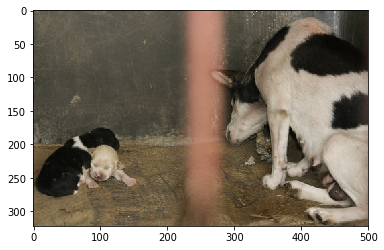

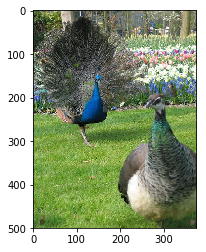

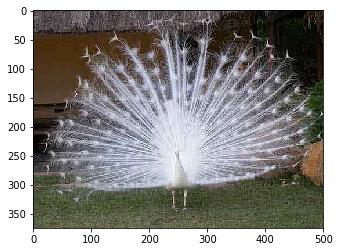

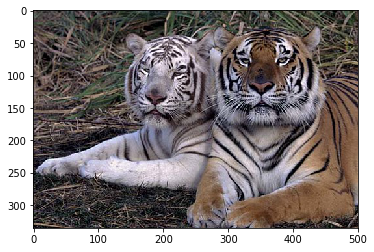

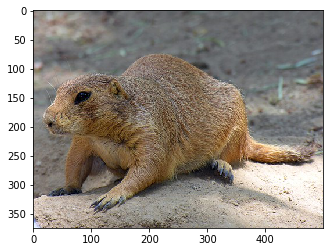

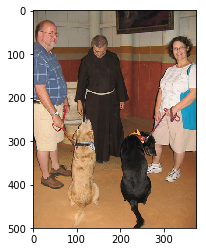

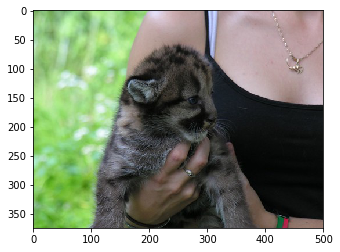

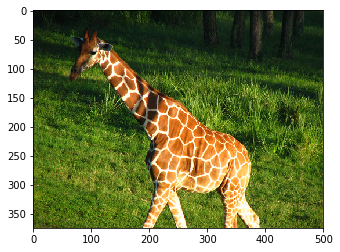

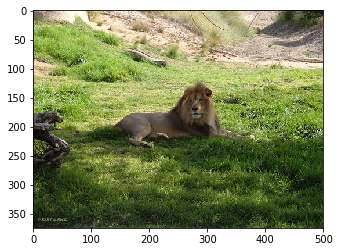

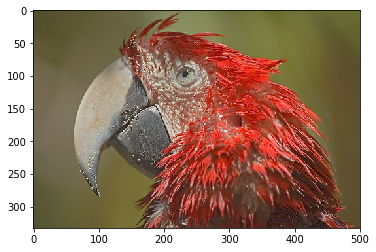

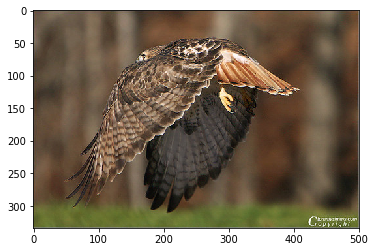

In [78]:
result = img2arr_fromURLs(df2['URL'].values[0:20])
print("Total images that we got: %i " % len(result))

for im_get in result:
    plt.imshow(im_get)
    plt.show()